In [134]:
from matplotlib import pyplot as plt

In [146]:
def argmax(arr):
    # Both max bet and ??? bet are optimal, here we ignore slight difference and select ??? bet style.
    arr = [round(v, 6) for v in arr]
    index = 0
    for i, v in enumerate(arr):
        # select bigger index(= more money)
        # if v > arr[index]:
        # select smaller index(= less money)
        if v > arr[index]:
            index = i
    return index

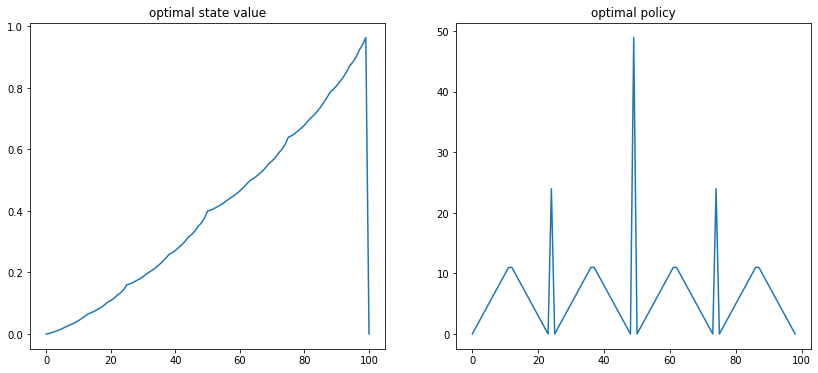

In [158]:
V = [0 for _ in range(100+1)]

theta = 1e-6

p = 0.4
discount = 1.0

while True:
    delta = 0
    for s in range(1, 100):
        v = V[s]
        V[s] = max([p*(discount*V[s+bet] + (1 if s+bet >= 100 else 0)) + (1-p)*discount*V[s-bet] for bet in range(1, min(s, 100-s)+1)])
        delta = max(delta, abs(v-V[s]))
    if delta < theta:
        break

policy = [argmax([p*(discount*V[s+bet] + (1 if s+bet >= 100 else 0)) + (1-p)*discount*V[s-bet]  for bet in range(1, min(s, 100-s)+1)]) for s in range(1, 100)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title("optimal state value")
ax1.plot(V)

ax2.set_title("optimal policy")
ax2.plot(policy);